## Bioinformatics Workshop 2021 – S3 Documentation
## Jupyter Notebook Practice

#### Maartje Brouwer
#### 2021 Feb 03
#### This notebook is running Python 3.6.7

#### 1. Load raw data files

In [16]:
# with automagic OFF
# Navigate to raw data with %
%cd /export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/

/export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013


Alternatively turn automagic ON and navigate to raw data with !
Remember to use the ‘!’ symbol to indicate this is a shell command
%automagic 1
! cd /export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/Data/RawData

In [17]:
## Check the contents of the directory
# -l, including many details about the file
# -t, to show time of modification
# -h, to make size human readable
! ls -lth ./Data/RawData

total 4.0K
-rw-rw-r--. 1 mbrouwer mbrouwer 440 Feb  3 21:29 test.R
lrwxrwxrwx. 1 mbrouwer mbrouwer  43 Feb  3 17:30 NIOZ102_1.fastq -> /export/lv1/rawdata/NIOZ102/NIOZ102_1.fastq
lrwxrwxrwx. 1 mbrouwer mbrouwer  43 Feb  3 17:30 NIOZ102_2.fastq -> /export/lv1/rawdata/NIOZ102/NIOZ102_2.fastq
lrwxrwxrwx. 1 mbrouwer mbrouwer  43 Feb  3 17:29 NIOZ101_2.fastq -> /export/lv1/rawdata/NIOZ101/NIOZ101_2.fastq
lrwxrwxrwx. 1 mbrouwer mbrouwer  43 Feb  3 17:29 NIOZ101_1.fastq -> /export/lv1/rawdata/NIOZ101/NIOZ101_1.fastq


#### 2. Sequence Statistics

In [18]:
## Count the number of sequences in fastq files
# Open file with cat and count the number of lines with wc -l
# Divide by 4, because a fastq sequence is composed of 4 lines
# echo (calculation) | bc = basic calculator 
!echo $(cat ./Data/RawData/NIOZ101_1.fastq|wc -l)/4|bc
!echo $(cat ./Data/RawData/NIOZ101_2.fastq|wc -l)/4|bc
!echo $(cat ./Data/RawData/NIOZ102_1.fastq|wc -l)/4|bc
!echo $(cat ./Data/RawData/NIOZ102_2.fastq|wc -l)/4|bc

200000
200000
200000
200000


Trying out a for loop, but soes not work yet
!for file in ./Data/RawData/*.fastq;
filename = !(echo $file|awk -F'/' '{print $NF}');

This part works, but can't incorporate it in a for loop
!(echo ./Data/RawData/NIOZ101_1.fastq|awk -F'/' '{print $NF}')

More trying
!for file in ./Data/RawData/*.fastq;
filename = !(echo $file|awk -F'/' '{print $NF}');
number_sequences = !echo $(cat $file |wc -l)/4|bc
echo filename has number_sequences sequences


My own version
Find the length of the sequences in all the fastq files
This code counts them all up, not per sequence. You could divide by number of sequences maybe?
cat ./Data/RawData/NIOZ101_1.fastq | grep -B1 "^+" | grep -v "^+" | wc -c

In [19]:
## find the length of the sequences in all the fastq files
#This one does divide all lines in groups of 4 and then counts every 2nd line.
!cat ./Data/RawData/NIOZ101_1.fastq | awk 'NR%4==2{print length($0)}' > ./Data/NIOZ101_1_SeqLength.txt

In [20]:
#The same for the other files
!cat ./Data/RawData/NIOZ101_2.fastq | awk 'NR%4==2{print length($0)}' > ./Data/NIOZ101_2_SeqLength.txt

In [21]:
#The same for the other files
!cat ./Data/RawData/NIOZ102_1.fastq | awk 'NR%4==2{print length($0)}' > ./Data/NIOZ102_1_SeqLength.txt

In [22]:
#The same for the other files
!cat ./Data/RawData/NIOZ102_2.fastq | awk 'NR%4==2{print length($0)}' > ./Data/NIOZ102_2_SeqLength.txt

In [23]:
## Import panda's, the Python data analysis library
import pandas as pd

## Import mapping files as a dataframe with pandas
# pd.read_table mappingfile, tab seperated, column 0 is the index
NIOZ101_18SMap = pd.read_table("./ProjectInfo/NIOZ101/NIOZ101_18S_blackSea.txt", sep='\t', index_col = 0) 
NIOZ102_16SMap = pd.read_table("./ProjectInfo/NIOZ102/NIOZ102_16S_blackSea.txt", sep='\t', index_col = 0)

In [24]:
#Show the mappingfile
NIOZ101_18SMap

,BarcodeSequence,LinkerPrimerSequence,depth,salinity,DIC,HS,NH4,NO3,NO2,PO4,Si,temperature,oxygen,Description
#SampleID,,,,,,,,,,,,,,
NIOZ101.53,GCGGTTGCATCCAAGAACCGGAGA,GCTTGTCTCAAAGATTAAGCC,50,19.4,3.2920,0.10,0.083,1.273,0.077,0.738,26.560,7.908,121.000,Black Sea 50m
NIOZ101.54,TCGACCACAGCCAAGAACCTTCTC,GCTTGTCTCAAAGATTAAGCC,70,20.1,3.3260,0.15,0.053,2.493,0.023,1.121,45.800,8.418,2.194,Black Sea 70m
NIOZ101.55,AGCTGCACAGCCCCGAATTGGTCA,GCTTGTCTCAAAGATTAAGCC,80,20.4,3.2690,0.10,0.058,2.518,0.024,1.137,45.725,8.494,0.509,Black Sea 80m
NIOZ101.56,CTAGTCACAGCCCCGAATTAACTG,GCTTGTCTCAAAGATTAAGCC,85,20.5,3.2730,0.15,0.063,0.344,0.042,0.787,55.360,8.504,0.333,Black Sea 85m
NIOZ101.57,CCGTGGTCATCCAAGAAGGTTGAA,GCTTGTCTCAAAGATTAAGCC,90,20.6,3.2950,0.10,0.423,0.035,0.015,2.121,57.840,8.513,0.321,Black Sea 90m
NIOZ101.58,TTACAGTCATCCAAGATATATTAT,GCTTGTCTCAAAGATTAAGCC,95,20.8,3.3058,0.20,1.080,0.040,0.014,4.680,61.740,8.531,0.325,Black Sea 95m
NIOZ101.59,AATGTGTCAGCCCCGATCGGCCGA,GCTTGTCTCAAAGATTAAGCC,100,20.9,3.3188,0.20,5.730,0.030,0.012,7.155,64.740,8.543,0.323,Black Sea 100m
NIOZ101.60,GCTTCTCGATCCCCGATCGATTAG,GCTTGTCTCAAAGATTAAGCC,105,20.9,3.3330,0.85,7.208,0.030,0.016,7.910,66.290,8.555,0.324,Black Sea 105m
NIOZ101.61,CGAAGTCGATCCCCGATCGTAATC,GCTTGTCTCAAAGATTAAGCC,110,20.9,3.3520,4.60,8.759,0.027,0.013,6.740,70.590,8.573,0.324,Black Sea 110m


In [25]:
#Show the 16S mappingfile
NIOZ102_16SMap

,BarcodeSequence,LinkerPrimerSequence,depth,salinity,DIC,HS,NH4,NO3,NO2,PO4,Si,temperature,oxygen,Description
#SampleID,,,,,,,,,,,,,,
NIOZ102.112,TCATCTTGATTGACCAGAAATGTC,GTGYCAGCMGCCGCGGTAA,50,19.4,3.2920,0.10,0.083,1.273,0.077,0.738,26.560,7.908,121.000,Black Sea 50m
NIOZ102.113,TATATAGTATCCACCAGAAATGTC,GTGYCAGCMGCCGCGGTAA,70,20.1,3.3260,0.15,0.053,2.493,0.023,1.121,45.800,8.418,2.194,Black Sea 70m
NIOZ102.114,ACTGTTTACTGTACCAGAAATGTC,GTGYCAGCMGCCGCGGTAA,80,20.4,3.2690,0.10,0.058,2.518,0.024,1.137,45.725,8.494,0.509,Black Sea 80m
NIOZ102.115,GTCACGGACATTACCAGAAATGTC,GTGYCAGCMGCCGCGGTAA,85,20.5,3.2730,0.15,0.063,0.344,0.042,0.787,55.360,8.504,0.333,Black Sea 85m
NIOZ102.116,GAATATACCTGGACCAGAAATGTC,GTGYCAGCMGCCGCGGTAA,90,20.6,3.2950,0.10,0.423,0.035,0.015,2.121,57.840,8.513,0.321,Black Sea 90m
NIOZ102.117,GAATCTGACAACACCAGAAATGTC,GTGYCAGCMGCCGCGGTAA,95,20.8,3.3058,0.20,1.080,0.040,0.014,4.680,61.740,8.531,0.325,Black Sea 95m
NIOZ102.118,ATTGCCTTGATTACCAGAAATGTC,GTGYCAGCMGCCGCGGTAA,100,20.9,3.3188,0.20,5.730,0.030,0.012,7.155,64.740,8.543,0.323,Black Sea 100m
NIOZ102.119,GAGCCCAAAGAGACCAGAAATGTC,GTGYCAGCMGCCGCGGTAA,105,20.9,3.3330,0.85,7.208,0.030,0.016,7.910,66.290,8.555,0.324,Black Sea 105m
NIOZ102.120,CCATGTGGCTCCACCAGAAATGTC,GTGYCAGCMGCCGCGGTAA,110,20.9,3.3520,4.60,8.759,0.027,0.013,6.740,70.590,8.573,0.324,Black Sea 110m


In [26]:
## Count number of 18S sequences in R1 that are from
## 2000m
#Open de fwd fastq file and count how many times the fwd primer barcode can be found
!cat ./Data/RawData/NIOZ101_1.fastq | grep -c "CAGCTAGGATCC" 

11072


In [27]:
## Import 18S mapping file with separate forward and reverse barcodes
NIOZ101_18SMap_splitBcd = pd.read_table("./ProjectInfo/NIOZ101/NIOZ101_18S_blackSea_SplitBcd.txt", sep='\t', index_col = 0)

# Reverse complement R2 (rev) sequences with seqtk(v1.2-r102-dirty)
!seqtk seq -r ./Data/RawData/NIOZ101_2.fastq > ./Data/NIOZ_101_2_RC.fastq
!seqtk seq -r ./Data/RawData/NIOZ102_2.fastq > ./Data/NIOZ_102_2_RC.fastq

In [28]:
#Show the split mapping file
NIOZ101_18SMap_splitBcd

,BarcodeSequenceFwd,BarcodeSequenceRev,LinkerPrimerSequence,depth,salinity,DIC,HS,NH4,NO3,NO2,PO4,Si,temperature,oxygen,Description
#SampleID,,,,,,,,,,,,,,,
NIOZ101.53,GCGGTTGCATCC,AAGAACCGGAGA,GCTTGTCTCAAAGATTAAGCC,50,19.4,3.2920,0.10,0.083,1.273,0.077,0.738,26.560,7.908,121.000,Black Sea 50m
NIOZ101.54,TCGACCACAGCC,AAGAACCTTCTC,GCTTGTCTCAAAGATTAAGCC,70,20.1,3.3260,0.15,0.053,2.493,0.023,1.121,45.800,8.418,2.194,Black Sea 70m
NIOZ101.55,AGCTGCACAGCC,CCGAATTGGTCA,GCTTGTCTCAAAGATTAAGCC,80,20.4,3.2690,0.10,0.058,2.518,0.024,1.137,45.725,8.494,0.509,Black Sea 80m
NIOZ101.56,CTAGTCACAGCC,CCGAATTAACTG,GCTTGTCTCAAAGATTAAGCC,85,20.5,3.2730,0.15,0.063,0.344,0.042,0.787,55.360,8.504,0.333,Black Sea 85m
NIOZ101.57,CCGTGGTCATCC,AAGAAGGTTGAA,GCTTGTCTCAAAGATTAAGCC,90,20.6,3.2950,0.10,0.423,0.035,0.015,2.121,57.840,8.513,0.321,Black Sea 90m
NIOZ101.58,TTACAGTCATCC,AAGATATATTAT,GCTTGTCTCAAAGATTAAGCC,95,20.8,3.3058,0.20,1.080,0.040,0.014,4.680,61.740,8.531,0.325,Black Sea 95m
NIOZ101.59,AATGTGTCAGCC,CCGATCGGCCGA,GCTTGTCTCAAAGATTAAGCC,100,20.9,3.3188,0.20,5.730,0.030,0.012,7.155,64.740,8.543,0.323,Black Sea 100m
NIOZ101.60,GCTTCTCGATCC,CCGATCGATTAG,GCTTGTCTCAAAGATTAAGCC,105,20.9,3.3330,0.85,7.208,0.030,0.016,7.910,66.290,8.555,0.324,Black Sea 105m
NIOZ101.61,CGAAGTCGATCC,CCGATCGTAATC,GCTTGTCTCAAAGATTAAGCC,110,20.9,3.3520,4.60,8.759,0.027,0.013,6.740,70.590,8.573,0.324,Black Sea 110m


In [29]:
## Count number of 18S sequences in R2 that are from
## 2000m
# Open the reverse complement sequences file you just made
# Count how many times the rev primer barcode can be found
!cat ./Data/NIOZ_101_2_RC.fastq | grep -c "AAGATCGCGTAA" 

11682


In [30]:
## Count number of 18S sequences in R1 that are from
## 500m
#Open de fwd fastq file and count how many times the fwd primer barcode can be found
!cat ./Data/RawData/NIOZ101_1.fastq | grep -c "GCGGTTGCATCC" 

## Count number of 18S sequences in R2 that are from
## 50m
# Open the reverse complement sequences file you just made
# Count how many times the rev primer barcode can be found
!cat ./Data/NIOZ_101_2_RC.fastq | grep -c "AAGAACCGGAGA" 

11587
11571


##### 3. Summary of 18S sequence numbers across Black Sea 2013 50m and 2000m samples

In [31]:
# Import matplotlib(v.3.1.1), Python's plotting library
import matplotlib.pyplot as plt

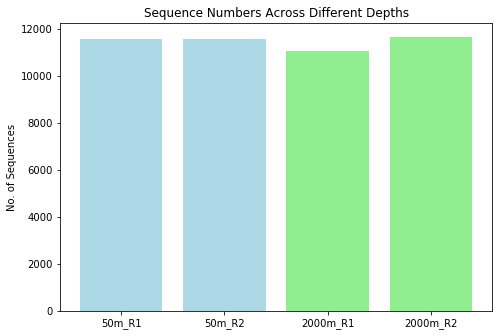

In [32]:
## Plot the number of R1 and R2 sequences found across the 2 depths with Matplotlib

fastq = ['50m_R1', '50m_R2', '2000m_R1', '2000m_R2']
seq_no = [11587, 11571, 11072, 11682]

fig = plt.figure()
ax  = fig.add_axes([0,0,1,1])
ax.bar(fastq, seq_no, color=['lightblue', 'lightblue', 'lightgreen', 'lightgreen'])
ax.set_ylabel('No. of Sequences')
ax.set_title('Sequence Numbers Across Different Depths')
plt.show()